# Clase 3

## Estadística

**Población**: conjunto de eventos o individuos que son de interés para un determinado experimento o al realizar una hipótesis

**Muestra**: subconjunto de una población

Ej: - Queremos saber como se distribuyen las edades de las personas en una ciudad de N habitantes y hacemos una encuesta a n personas (n<N) que caminan por la calle. La población de nuestro interés son todos los N habitantes de la ciudad. Nuestra muestra son los n habitantes que encuestamos en la calle.


### Distribuciones de probabilidad

Para los valores posible de un experimento se tienen la probabilidad de ocurrencia del mismo.

Ej: número de clientes que llegan a un mostrador dentro de una ventana dada de tiempo siguen la [distribución de poisson](https://es.wikipedia.org/wiki/Distribución_de_Poisson):

$$P(k) =  \frac{\lambda^{k} e^{-\lambda}}{k!} \\
k: \text{número de clientes que llegan} \\
\lambda: \text{tasa de llegada de los clientes}$$

Esta distribución tiene las siguientes propiedades:

$$ \mu_{poisson} = \lambda \\
\sigma_{poisson}^2 = \lambda$$

Por ejemplo, para $$\lambda = 15 \text{ clientes por hora}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import math

sns.set(rc={'figure.figsize': (12,8)})

In [2]:
k = np.arange(1, 35)
lambda_ = 15
distribucion = [np.power(lambda_, k_i)*np.exp(-lambda_)/np.math.factorial(k_i) for k_i in k]

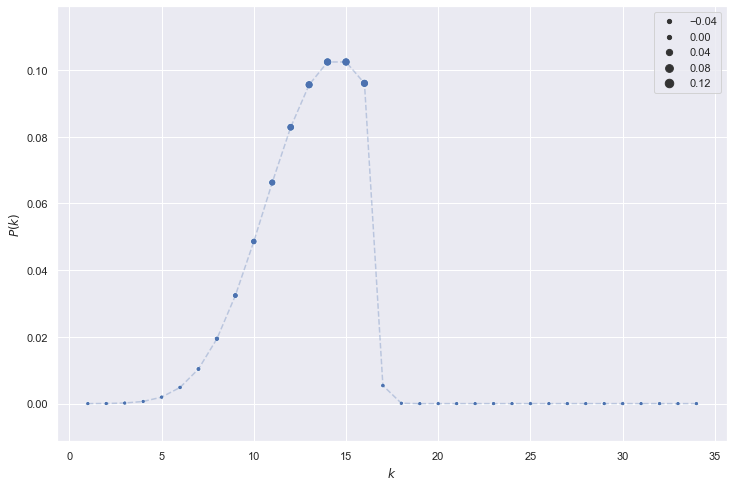

In [3]:
ax = sns.scatterplot(k, distribucion, size=distribucion)
ax.set_xlabel('$k$')
ax.set_ylabel('$P(k)$')
ax.plot(k, distribucion, '--', alpha=0.3);

### Propiedades de una distribución de probabilidad


**Valor medio**: valor al que tiende la variable en cuestión. Se calcula como: $$\sum_{i} x_i * P(x_i)$$ En nuestro ejemplo es 15.

**Varianza**: medida de cuan dispersa es la variable (línea en el gráfico). En nuestro caso también es 15. 
\
Particularmente la distribución de poisson tiene la particularidad que la varianza y el valor medio son iguales y son igual a $\lambda$.

### Medidas de tendencia central y dispersión

Intentan medir la tendencia de un grupo de datos y cuan dispersos se encuentran. Los principales y más utilizados son:

**Media aritmética o promedio**: la tendencia de la media de los datos, da la idea de valor medio,.

**Moda**: es el valor con mayor frecuencia en los datos.

**Mediana**: posición central en un conjunto de datos ordenados.

**Varianza**: medida de disperción de los datos

Ej: generamos 1000 puntos de una distribución normal, con media 0 y varianza 1.
    Graficamos el histograma normalizado: dividiendo los valores obtenidos en intervalos y contando cuantos valores caen dentro de dicho intervalo respecto al total de valores obtenidos

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """


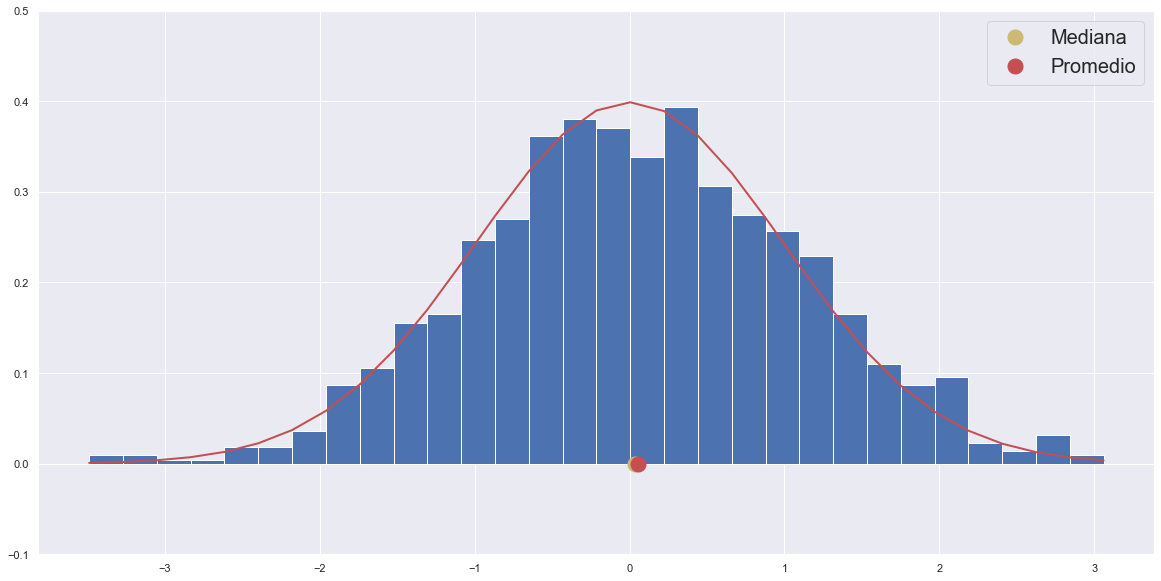

In [7]:
mu = 0
sigma = 1
s = np.random.normal(mu, sigma, 1000)
plt.figure(figsize=(20,10))
count, bins, ignored = plt.hist(s, 30, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')

plt.ylim(-0.1,0.5)
plt.plot(np.median(s), 0, "oy", markersize = 15, label='Mediana')
plt.plot(np.mean(s), 0, "or", markersize = 15, label='Promedio')
plt.legend(fontsize=20)
plt.show()

La media y la mediana (vista como el valor "del medio") parecieran tener el mismo comportamiento, sin embargo en caso de tener outliers, es decir, datos que por alguna razón se "alejan" de la gran mayoría, la mediana es mejor medida de la tendencia media de los datos.

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


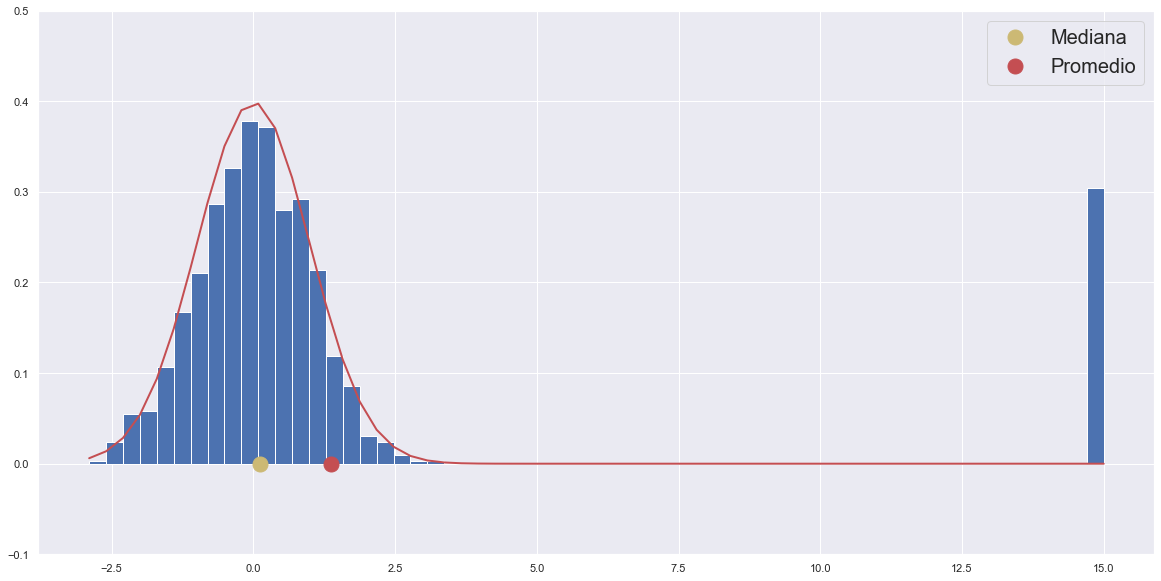

In [8]:
mu = 0
sigma = 1
s = np.random.normal(mu, sigma, 1000)
s = np.append(s,[15]*100)
plt.figure(figsize=(20,10))
count, bins, ignored = plt.hist(s, 60, normed=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
                np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
          linewidth=2, color='r')

plt.ylim(-0.1,0.5)
plt.plot(np.median(s), 0, "oy", markersize = 15, label="Mediana")
plt.plot(np.mean(s), 0, "or", markersize = 15, label="Promedio")
plt.legend(fontsize=20)
plt.show()

Por lo que la mediana no se ve afectada por valores atípicos.

**Inferencia estadística**: usar los datos para estimar alguna propiedad o parámetro de la distribución de probabilidad suyacente, es decir, usar los datos de muestreo para determinar propiedades de la población. A la propiedad estimada se la suele llamar **estadístico** y si se usa la propiedad es para estimar algún parámetro específico de la distribucíon de la población de suele llamar **estimadores**.

ej: Se tiene un dado con la siguiente distribución de probabilidad:

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 0, 'Salida del dado')

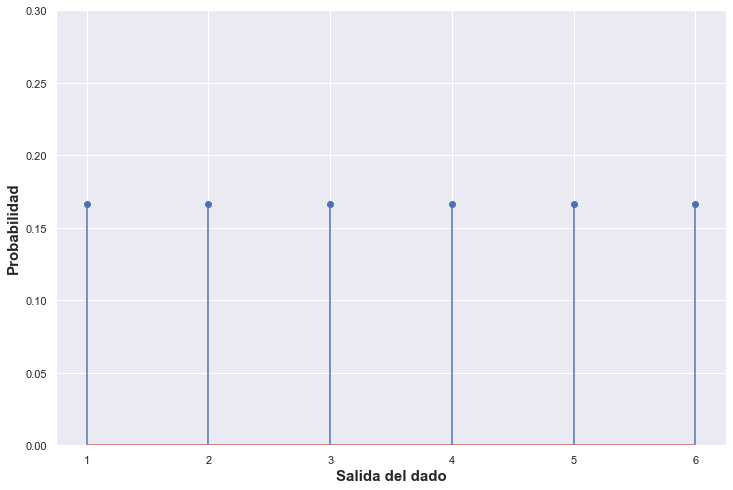

In [15]:
numero_obtenido = [ 1, 2, 3, 4, 5, 6]
probabilidad = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
plt.stem(numero_obtenido, probabilidad)
plt.ylim(0,0.3)
plt.ylabel('Probabilidad', fontsize=15, weight='bold')
plt.xlabel('Salida del dado', fontsize=15, weight='bold')

Observando la distribución, el valor medio es: 

$$\sum_{i} x_i * P(x_i) = \frac{1}{6}*1 + \frac{1}{6}*2 + \frac{1}{6}*3 + \frac{1}{6}*4 + \frac{1}{6}*5 + \frac{1}{6}*6 = 3.5$$

Por el contrario, supongamos que no sabemos nada de la distribución de probabilidad y solo tenemos el dado. Lo tiramos 1000 veces y obtenemos el siguiente histograma:

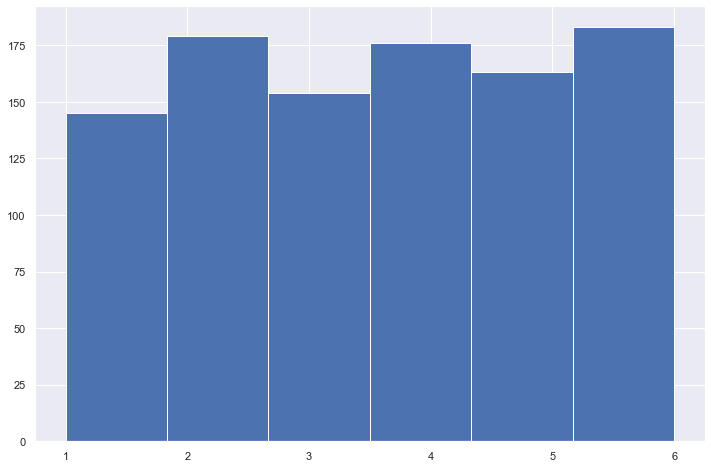

In [14]:
x=[math.ceil(i) for i in np.random.rand(1000)*6]
frecuencia, bins, _  = plt.hist(x,6)


Calculamos el promedio de los datos obtenidos: $$\frac{1}{100}\sum^{100}_{i=1} x_i$$

In [111]:
np.mean(x)

3.511

Se observa que este valor es cercano al valor 3.5 del valor medio de la distribución, por lo que el promedio es un estimador del valor medio, notando que se usaron valores del experimento para estimar una propiedad de la distribución.